# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">TRAIN MODEL SVC</div>


In [1]:
# Import library needed
import os
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from random import randint
from time import sleep


# Function
def save_pkl(obj: any, name: str):
    """Saves an object to a pickle file, ensuring proper file extension and security.

    Args:
        obj: The object to serialize and save.
        name (str): The desired filename or path.
            - If it doesn't end with ".pkl", `.pkl` will be appended.
            - Supports relative and absolute paths.
        protocol (int, optional): The pickle protocol version to use. Defaults to the
            highest compatible with the current Python version.

    Raises:
        ValueError: If `name` is an empty string or if file operations fail.
        PickleError: If pickling encounters an error.
    """

    
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    if not name.endswith(".pkl"):
        name += ".pkl"

    try:
        with open(name, 'wb') as file:
            pickle.dump(obj, file)
    except (OSError, IOError) as e:
        raise ValueError(f"Failed to save pickle file: {e}") from e
    except pickle.PickleError as e:
        raise pickle.PickleError(f"Pickling error: {e}") from e

    print(f"Saved: \"{name}\"")

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()


In [2]:
# Read dataset
df = pd.read_csv('imo.csv')

In [3]:
df_notna = df[df["label"].notna()]
df_notna.reset_index(drop=True, inplace=True)

  1. Accuracy = 87.76%

Overall accuracy model:
Accuracy  = 87.76%
Precision = 87.93%
Recall    = 87.76%
F1-score  = 87.80%

Accuracy model for each label:
Algebra       = 83.82%
Combinatorics = 87.18%
Geometry      = 93.98%
Number Theory = 84.17%


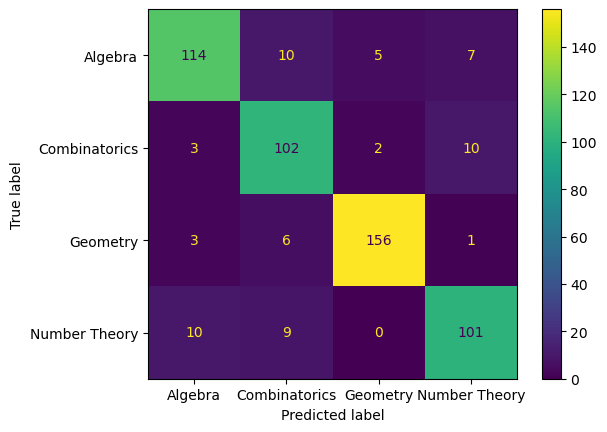

Saved: "SVC_88_accuracy/SVC_.pkl"
Saved: "SVC_88_accuracy/vectorizer.pkl"
Saved: "SVC_88_accuracy/X_train.pkl"
Saved: "SVC_88_accuracy/X_test.pkl"
Saved: "SVC_88_accuracy/y_train.pkl"
Saved: "SVC_88_accuracy/y_test.pkl"


In [4]:
for i in range(500):
    # Kurangi soal geometry
    aa = df_notna[df_notna['label'] == "Algebra"].sample(695)
    cc = df_notna[df_notna['label'] == "Combinatorics"].sample(600)
    gg = df_notna[df_notna['label'] == "Geometry"].sample(720)
    nt = df_notna[df_notna['label'] == "Number Theory"].sample(678)
    df_notna = pd.concat([aa, cc, gg, nt], axis=0)

    # Shuffle 
    for j in range(232):
        df_notna = df_notna.sample(frac=1, random_state=j+randint(1, 100))
        df_notna = df_notna.sample(frac=1)
    df_notna.reset_index(drop=True, inplace=True)

    # Split
    X, y = df_notna["post_canonical"], df_notna["label"]

    # Preprocess text data (Representation text to numeric)
    vectorizer = TfidfVectorizer()
    text_features = vectorizer.fit_transform(X)

    # Split training and test 
    X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.2, random_state=4)

    # Train model
    model = SVC(kernel='linear', C=1.0, probability=True)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Mencari model dengan tingkat accuracy yang diinginkan
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{str(i+1):>3s}. Accuracy = {accuracy*100:<.2f}%\n")
    
    if accuracy >= 0.84:
        directory = f"SVC_{round(accuracy*100)}_accuracy"
        os.makedirs(directory, exist_ok=True); sleep(1);
        
        model_information(model, X_test, y_test)
        save_pkl(model, f"{directory}/SVC_.pkl")
        save_pkl(vectorizer, f"{directory}/vectorizer.pkl")

        X.to_csv(f"{directory}/X.csv", index=False)
        y.to_csv(f"{directory}/y.csv", index=False)
        
        save_pkl(X_train, f"{directory}/X_train.pkl")
        save_pkl(X_test, f"{directory}/X_test.pkl")
        save_pkl(y_train, f"{directory}/y_train.pkl")
        save_pkl(y_test, f"{directory}/y_test.pkl")
        break
    
    sleep (.25)
